In [195]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Import dataset
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [149]:
dfNA = df.filter(like="NaN", axis=0)
len(dfNA)

0

In [150]:
for col in df:
    print(f"{col}: {df[col].unique()}")

class: ['p' 'e']
cap-shape: ['x' 'b' 's' 'f' 'k' 'c']
cap-surface: ['s' 'y' 'f' 'g']
cap-color: ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises: ['t' 'f']
odor: ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment: ['f' 'a']
gill-spacing: ['c' 'w']
gill-size: ['n' 'b']
gill-color: ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape: ['e' 't']
stalk-root: ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring: ['s' 'f' 'k' 'y']
stalk-surface-below-ring: ['s' 'f' 'y' 'k']
stalk-color-above-ring: ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring: ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type: ['p']
veil-color: ['w' 'n' 'o' 'y']
ring-number: ['o' 't' 'n']
ring-type: ['p' 'e' 'l' 'f' 'n']
spore-print-color: ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population: ['s' 'n' 'a' 'v' 'y' 'c']
habitat: ['u' 'g' 'm' 'd' 'p' 'w' 'l']


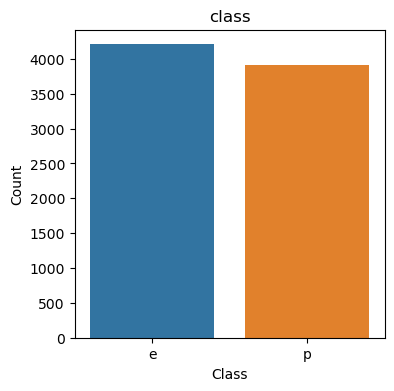

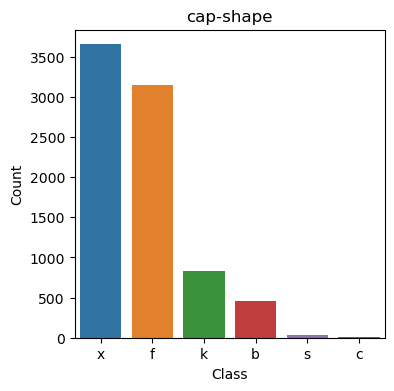

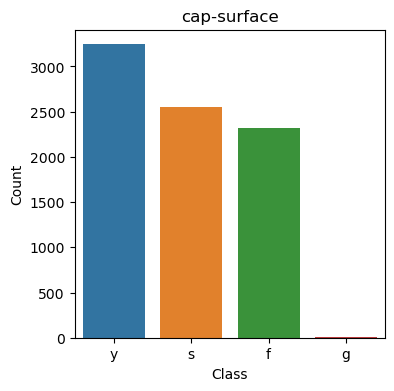

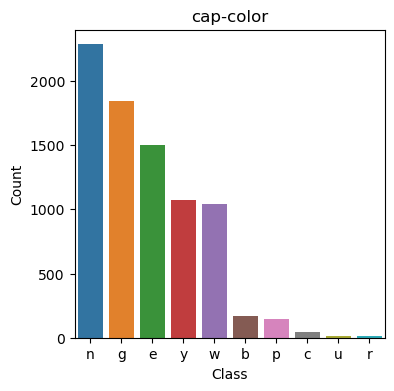

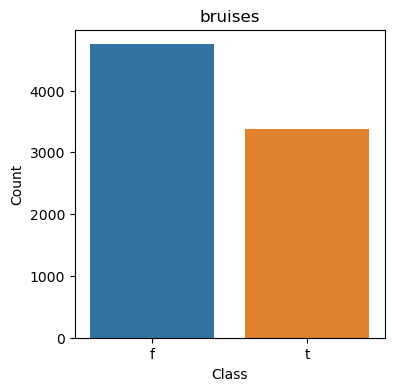

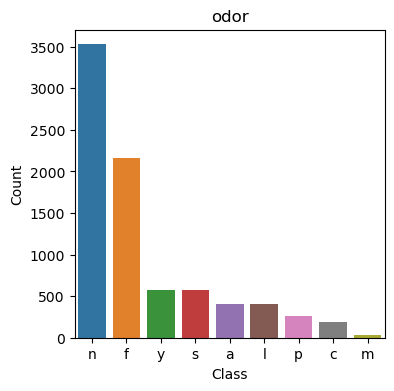

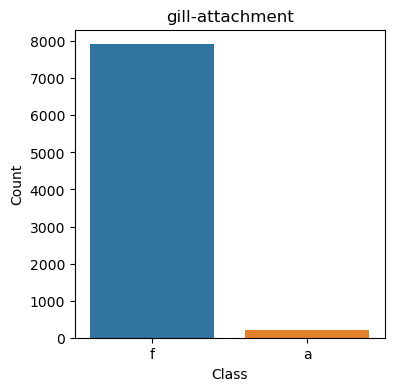

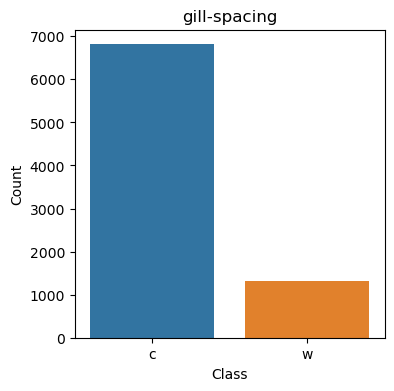

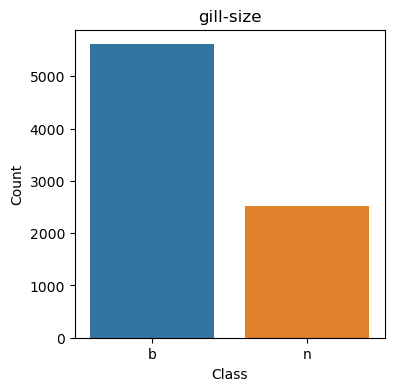

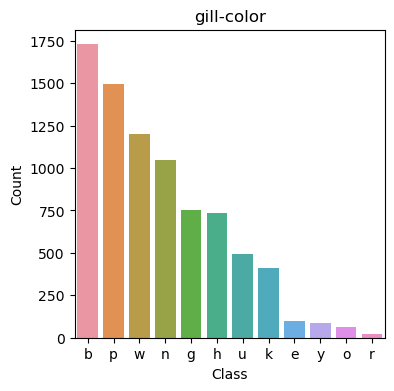

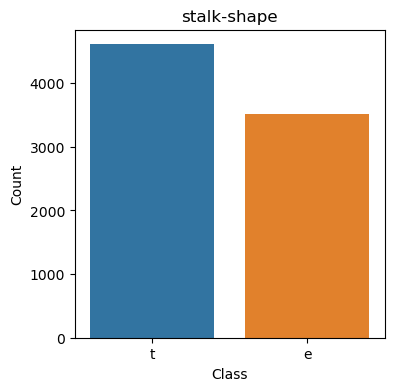

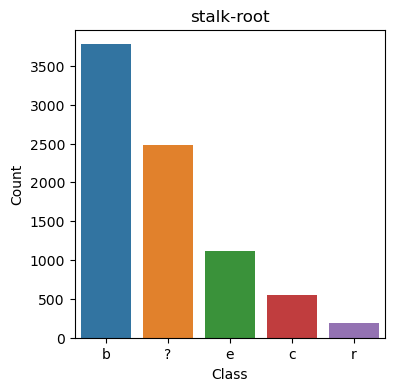

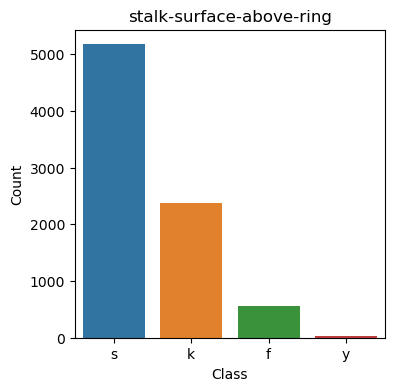

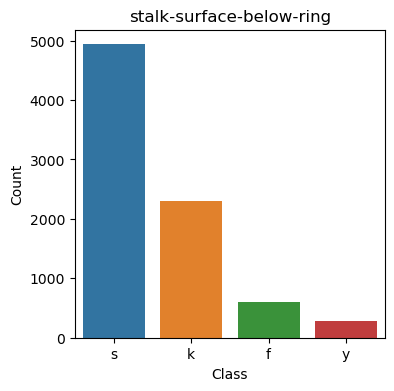

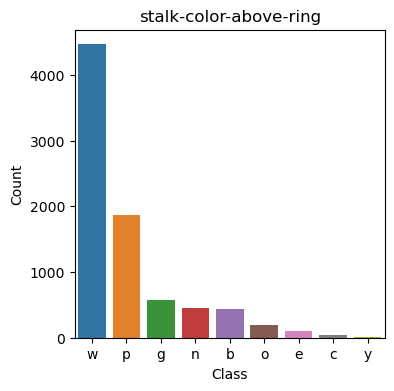

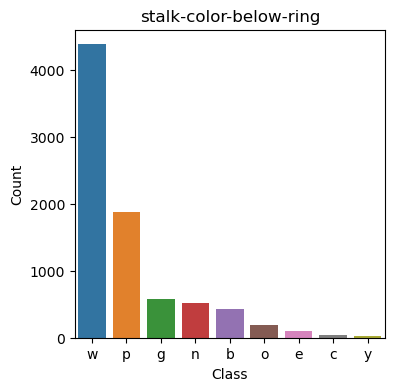

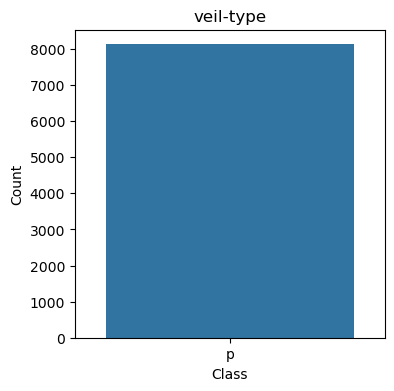

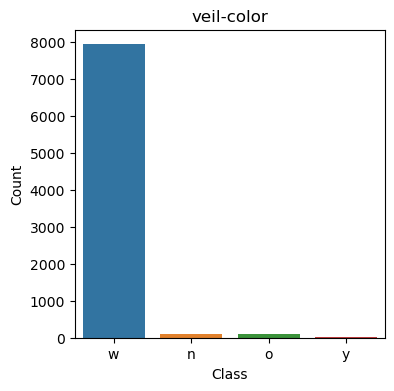

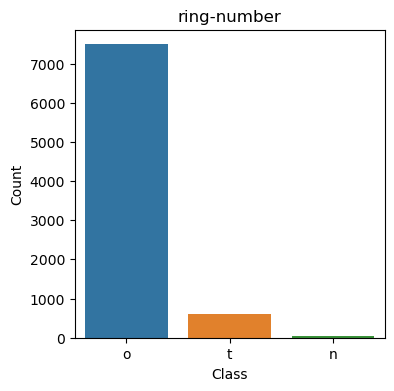

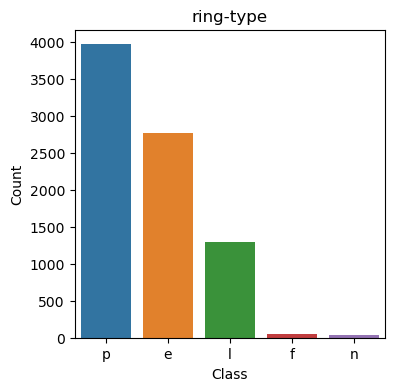

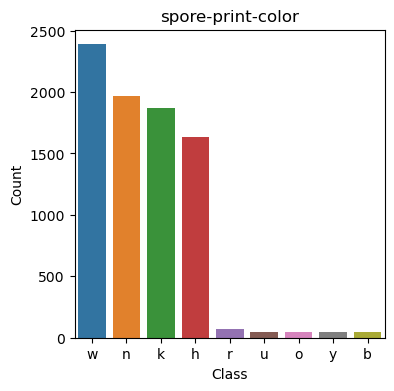

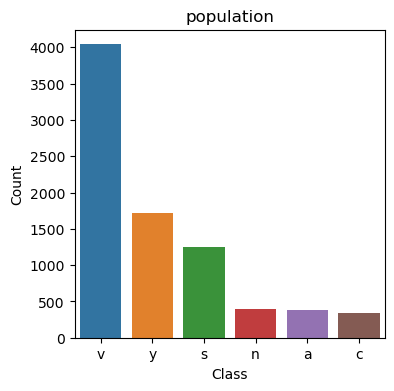

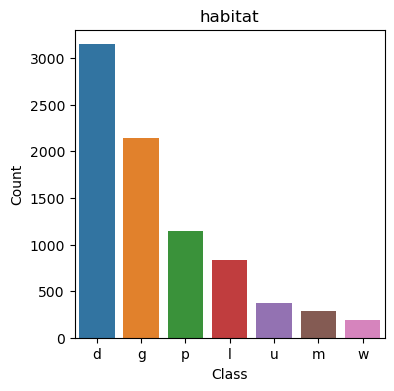

In [196]:
for col in df:
    plt.figure(figsize=(4, 4))
    sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts().values)
    plt.title(f'{col}')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.show()

In [152]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
encoder = OneHotEncoder(sparse_output=False)
onehot = LabelEncoder()

df = df.drop(['veil-type'], axis=1)
y = df['class']

y = onehot.fit_transform(y)

dfs = [] 
for col in df.columns:
    encodedData = encoder.fit_transform(df[[col]])
    oneHotDF = pd.DataFrame(encodedData, columns=encoder.categories_)
    dfs.append(oneHotDF)
    df = df.drop([col], axis=1)
x = pd.concat([df] + dfs, axis=1)
    

x.head()
    

,"(e,)","(p,)","(b,)","(c,)","(f,)","(k,)","(s,)","(x,)","(f,)","(g,)",...,"(s,)","(v,)","(y,)","(d,)","(g,)","(l,)","(m,)","(p,)","(u,)","(w,)"
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [153]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

xTrain, xTest, yTrain, yTest = train_test_split(
    x, y, 
    test_size=0.05,
    stratify=y,
    shuffle = True)

In [154]:
#DT
from sklearn.tree import DecisionTreeClassifier
parameters = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [None, 10, 20, 30, 40, 50],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': [None, 'sqrt', 'log2']}  
gridSearch = GridSearchCV(estimator = DecisionTreeClassifier(),  
                           param_grid = parameters,
                           scoring = 'recall',
                           cv = 5,
                           verbose=0)
gridSearch.fit(xTrain, yTrain) 
treeParams = gridSearch.best_params_
treeParams

{'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [155]:
#MLP
from sklearn.neural_network import MLPClassifier
parameters = parameter_space = {
    'max_iter': [1000],
    'hidden_layer_sizes': [(50,50), (50,50,50), (100)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
gridSearch = GridSearchCV(estimator = MLPClassifier(),  
                           param_grid = parameters,
                           scoring = 'recall',
                           cv = 5,
                           verbose=0)
gridSearch.fit(xTrain, yTrain) 
mlpParams = gridSearch.best_params_
mlpParams

{'activation': 'relu',
 'alpha': 0.0001,
 'hidden_layer_sizes': (50, 50),
 'learning_rate': 'constant',
 'max_iter': 1000,
 'solver': 'adam'}

In [156]:
#SVM
from sklearn.svm import SVC
parameters = {'C':[1,10,100,1000],
              'gamma':[1,0.1,0.001,0.0001], 
              'kernel':['linear','rbf']}
gridSearch = GridSearchCV(estimator = SVC(),  
                           param_grid = parameters,
                           scoring = 'recall',
                           cv = 5,
                           verbose=0)
gridSearch.fit(xTrain, yTrain) 
svmParams = gridSearch.best_params_
svmParams

{'C': 1, 'gamma': 1, 'kernel': 'linear'}

In [157]:
#RF
#Asked chatGPT to adapt the code above to a random forest classifier
from sklearn.ensemble import RandomForestClassifier
parameters = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
}
gridSearch = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=parameters,
    scoring='recall',
    cv=5,
    verbose=1,
    n_jobs=-1
)
gridSearch.fit(xTrain, yTrain)
rf_params = gridSearch.best_params_
rf_params

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


e:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
2160 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1258 fits failed with the following error:
Traceback (most recent call last):
  File "e:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "e:\anaconda\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "e:\anaconda\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "e:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_p

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [158]:
#Gradient boost
#Asked it to adapt for Gradient boost

from sklearn.ensemble import GradientBoostingClassifier
parameters = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
gridSearch = GridSearchCV(
    estimator=GradientBoostingClassifier(),
    param_grid=parameters,
    scoring='recall',
    cv=5,
    verbose=0,
    n_jobs=-1
)
gridSearch.fit(xTrain, yTrain)
gb_params = gridSearch.best_params_
gb_params

{'learning_rate': 0.01,
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [159]:
#KNN
#Asked it to adapt for KNN

from sklearn.neighbors import KNeighborsClassifier
parameters = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}
gridSearch = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=parameters,
    scoring='recall',
    cv=5,
    verbose=0,
    n_jobs=-1
)
gridSearch.fit(xTrain, yTrain)
knn_params = gridSearch.best_params_
knn_params


e:\anaconda\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [nan  1. nan  1. nan  1. nan  1. nan  1. nan  1. nan  1. nan  1. nan  1.
 nan  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1. nan  1. nan  1. nan  1. nan  1. nan  1. nan  1.
 nan  1. nan  1. nan  1. nan  1.]
  warnings.warn(


{'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

In [160]:
import pickle
with open('svmModel.pkl', 'wb') as f:
    pickle.dump(svmParams, f)

with open('treeModel.pkl', 'wb') as f:
    pickle.dump(treeParams, f)

with open('nnModel.pkl', 'wb') as f:
    pickle.dump(mlpParams, f)

with open('rfModel.pkl', 'wb') as f:
    pickle.dump(rf_params, f)

with open('gbModel.pkl', 'wb') as f:
    pickle.dump(gb_params, f)

with open('knnModel.pkl', 'wb') as f:
    pickle.dump(knn_params, f)

In [161]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.preprocessing import StandardScaler

In [184]:
from sklearn.tree import DecisionTreeClassifier

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracyScores = []
f1Scores = []
precisionScores = []
recallScores = []
aucScores = []

for i, (trainIndex, valIndex) in enumerate(cv.split(xTrain, yTrain)):

    ### making training and validation sets
    # Convert indices to list
    trainIndex = trainIndex.tolist()
    valIndex = valIndex.tolist()
    
    # Split the data into training and validation sets for this fold
    xLocalTrain, xVal = xTrain.iloc[trainIndex], x.iloc[valIndex]
    yLocalTrain, yVal = yTrain[trainIndex], y[valIndex]


    ### feature scaling
    xScaler = StandardScaler()
    xColNames = xLocalTrain.columns.values.tolist()
    # train the scaler and apply it to the training set
    xTrainScaled = xScaler.fit_transform(xLocalTrain[xColNames])
    # apply the scaling to the validation set
    xValScaled = xScaler.transform(xVal[xColNames])

    ### model training
    # instantiate the model
    clf = DecisionTreeClassifier(**treeParams)
    # Train the classifier on the training data
    clf.fit(xTrainScaled, yLocalTrain)
    
    ### model prediction and evaluation
    # Make predictions on the test data
    yPred = clf.predict(xValScaled)

    # Calculate metrics and store them
    score = accuracy_score(yVal, yPred)
    accuracyScores.append(score)

    score = f1_score(yVal, yPred)
    f1Scores.append(score)

    score = precision_score(yVal, yPred)
    precisionScores.append(score)

    score = recall_score(yVal, yPred)
    recallScores.append(score)

    dtAccuracy = accuracy_score(yVal, yPred)
    dtFScore = f1_score(yVal, yPred)
    dtPrecision = precision_score(yVal, yPred)
    dtRecall = recall_score(yVal, yPred)

    print(f"Completed Fold {i}")
    print(f"    Accuracy={accuracyScores[i]}    Recall={recallScores[i]}    FScore={f1Scores[i]}")

Completed Fold 0
    Accuracy=1.0    Recall=1.0    FScore=1.0
Completed Fold 1
    Accuracy=1.0    Recall=1.0    FScore=1.0
Completed Fold 2
    Accuracy=1.0    Recall=1.0    FScore=1.0
Completed Fold 3
    Accuracy=1.0    Recall=1.0    FScore=1.0
Completed Fold 4
    Accuracy=1.0    Recall=1.0    FScore=1.0


In [185]:
from sklearn.neural_network import MLPClassifier

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracyScores = []
f1Scores = []
precisionScores = []
recallScores = []
aucScores = []

for i, (trainIndex, valIndex) in enumerate(cv.split(xTrain, yTrain)):

    ### making training and validation sets
    # Convert indices to list
    trainIndex = trainIndex.tolist()
    valIndex = valIndex.tolist()
    
    # Split the data into training and validation sets for this fold
    xLocalTrain, xVal = xTrain.iloc[trainIndex], x.iloc[valIndex]
    yLocalTrain, yVal = yTrain[trainIndex], y[valIndex]


    ### feature scaling
    xScaler = StandardScaler()
    xColNames = xLocalTrain.columns.values.tolist()
    # train the scaler and apply it to the training set
    xTrainScaled = xScaler.fit_transform(xLocalTrain[xColNames])
    # apply the scaling to the validation set
    xValScaled = xScaler.transform(xVal[xColNames])

    ### model training
    # instantiate the model
    clf = MLPClassifier(**mlpParams)
    # Train the classifier on the training data
    clf.fit(xTrainScaled, yLocalTrain)
    
    ### model prediction and evaluation
    # Make predictions on the test data
    yPred = clf.predict(xValScaled)

    # Calculate metrics and store them
    score = accuracy_score(yVal, yPred)
    accuracyScores.append(score)

    score = f1_score(yVal, yPred)
    f1Scores.append(score)

    score = precision_score(yVal, yPred)
    precisionScores.append(score)

    score = recall_score(yVal, yPred)
    recallScores.append(score)

    mlpAccuracy = accuracy_score(yVal, yPred)
    mlpFScore = f1_score(yVal, yPred)
    mlpPrecision = precision_score(yVal, yPred)
    mlpRecall = recall_score(yVal, yPred)

    print(f"Completed Fold {i}")
    print(f"    Accuracy={accuracyScores[i]}    Recall={recallScores[i]}    FScore={f1Scores[i]}")

Completed Fold 0
    Accuracy=1.0    Recall=1.0    FScore=1.0
Completed Fold 1
    Accuracy=1.0    Recall=1.0    FScore=1.0
Completed Fold 2
    Accuracy=1.0    Recall=1.0    FScore=1.0
Completed Fold 3
    Accuracy=1.0    Recall=1.0    FScore=1.0
Completed Fold 4
    Accuracy=1.0    Recall=1.0    FScore=1.0


In [186]:
from sklearn.svm import SVC

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracyScores = []
f1Scores = []
precisionScores = []
recallScores = []
aucScores = []

for i, (trainIndex, valIndex) in enumerate(cv.split(xTrain, yTrain)):

    ### making training and validation sets
    # Convert indices to list
    trainIndex = trainIndex.tolist()
    valIndex = valIndex.tolist()
    
    # Split the data into training and validation sets for this fold
    xLocalTrain, xVal = xTrain.iloc[trainIndex], x.iloc[valIndex]
    yLocalTrain, yVal = yTrain[trainIndex], y[valIndex]


    ### feature scaling
    xScaler = StandardScaler()
    xColNames = xLocalTrain.columns.values.tolist()
    # train the scaler and apply it to the training set
    xTrainScaled = xScaler.fit_transform(xLocalTrain[xColNames])
    # apply the scaling to the validation set
    xValScaled = xScaler.transform(xVal[xColNames])

    ### model training
    # instantiate the model
    clf = SVC(**svmParams)
    # Train the classifier on the training data
    clf.fit(xTrainScaled, yLocalTrain)
    
    ### model prediction and evaluation
    # Make predictions on the test data
    yPred = clf.predict(xValScaled)

    # Calculate metrics and store them
    score = accuracy_score(yVal, yPred)
    accuracyScores.append(score)

    score = f1_score(yVal, yPred)
    f1Scores.append(score)

    score = precision_score(yVal, yPred)
    precisionScores.append(score)

    score = recall_score(yVal, yPred)
    recallScores.append(score)

    svcAccuracy = accuracy_score(yVal, yPred)
    svcFScore = f1_score(yVal, yPred)
    svcPrecision = precision_score(yVal, yPred)
    svcRecall = recall_score(yVal, yPred)

    print(f"Completed Fold {i}")
    print(f"    Accuracy={accuracyScores[i]}    Recall={recallScores[i]}    FScore={f1Scores[i]}")

Completed Fold 0
    Accuracy=1.0    Recall=1.0    FScore=1.0
Completed Fold 1
    Accuracy=1.0    Recall=1.0    FScore=1.0
Completed Fold 2
    Accuracy=1.0    Recall=1.0    FScore=1.0
Completed Fold 3
    Accuracy=1.0    Recall=1.0    FScore=1.0
Completed Fold 4
    Accuracy=1.0    Recall=1.0    FScore=1.0


In [187]:
#Random Forest

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracyScores = []
f1Scores = []
precisionScores = []
recallScores = []
aucScores = []

for i, (trainIndex, valIndex) in enumerate(cv.split(xTrain, yTrain)):

    ### making training and validation sets
    # Convert indices to list
    trainIndex = trainIndex.tolist()
    valIndex = valIndex.tolist()
    
    # Split the data into training and validation sets for this fold
    xLocalTrain, xVal = xTrain.iloc[trainIndex], x.iloc[valIndex]
    yLocalTrain, yVal = yTrain[trainIndex], y[valIndex]


    ### feature scaling
    xScaler = StandardScaler()
    xColNames = xLocalTrain.columns.values.tolist()
    # train the scaler and apply it to the training set
    xTrainScaled = xScaler.fit_transform(xLocalTrain[xColNames])
    # apply the scaling to the validation set
    xValScaled = xScaler.transform(xVal[xColNames])

    ### model training
    # instantiate the model
    clf = RandomForestClassifier(**rf_params)
    # Train the classifier on the training data
    clf.fit(xTrainScaled, yLocalTrain)
    
    ### model prediction and evaluation
    # Make predictions on the test data
    yPred = clf.predict(xValScaled)

    # Calculate metrics and store them
    score = accuracy_score(yVal, yPred)
    accuracyScores.append(score)

    score = f1_score(yVal, yPred)
    f1Scores.append(score)

    score = precision_score(yVal, yPred)
    precisionScores.append(score)

    score = recall_score(yVal, yPred)
    recallScores.append(score)

    rfAccuracy = accuracy_score(yVal, yPred)
    rfFScore = f1_score(yVal, yPred)
    rfPrecision = precision_score(yVal, yPred)
    rfRecall = recall_score(yVal, yPred)

    print(f"Completed Fold {i}")
    print(f"    Accuracy={accuracyScores[i]}    Recall={recallScores[i]}    FScore={f1Scores[i]}")

Completed Fold 0
    Accuracy=1.0    Recall=1.0    FScore=1.0
Completed Fold 1
    Accuracy=1.0    Recall=1.0    FScore=1.0
Completed Fold 2
    Accuracy=1.0    Recall=1.0    FScore=1.0
Completed Fold 3
    Accuracy=1.0    Recall=1.0    FScore=1.0
Completed Fold 4
    Accuracy=1.0    Recall=1.0    FScore=1.0


In [188]:
#Gradient boost

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracyScores = []
f1Scores = []
precisionScores = []
recallScores = []
aucScores = []

for i, (trainIndex, valIndex) in enumerate(cv.split(xTrain, yTrain)):

    ### making training and validation sets
    # Convert indices to list
    trainIndex = trainIndex.tolist()
    valIndex = valIndex.tolist()
    
    # Split the data into training and validation sets for this fold
    xLocalTrain, xVal = xTrain.iloc[trainIndex], x.iloc[valIndex]
    yLocalTrain, yVal = yTrain[trainIndex], y[valIndex]


    ### feature scaling
    xScaler = StandardScaler()
    xColNames = xLocalTrain.columns.values.tolist()
    # train the scaler and apply it to the training set
    xTrainScaled = xScaler.fit_transform(xLocalTrain[xColNames])
    # apply the scaling to the validation set
    xValScaled = xScaler.transform(xVal[xColNames])

    ### model training
    # instantiate the model
    clf = GradientBoostingClassifier(**gb_params)
    # Train the classifier on the training data
    clf.fit(xTrainScaled, yLocalTrain)
    
    ### model prediction and evaluation
    # Make predictions on the test data
    yPred = clf.predict(xValScaled)

    # Calculate metrics and store them
    score = accuracy_score(yVal, yPred)
    accuracyScores.append(score)

    score = f1_score(yVal, yPred)
    f1Scores.append(score)

    score = precision_score(yVal, yPred)
    precisionScores.append(score)

    score = recall_score(yVal, yPred)
    recallScores.append(score)

    gbAccuracy = accuracy_score(yVal, yPred)
    gbFScore = f1_score(yVal, yPred)
    gbPrecision = precision_score(yVal, yPred)
    gbRecall = recall_score(yVal, yPred)

    print(f"Completed Fold {i}")
    print(f"    Accuracy={accuracyScores[i]}    Recall={recallScores[i]}    FScore={f1Scores[i]}")

Completed Fold 0
    Accuracy=1.0    Recall=1.0    FScore=1.0
Completed Fold 1
    Accuracy=1.0    Recall=1.0    FScore=1.0
Completed Fold 2
    Accuracy=1.0    Recall=1.0    FScore=1.0
Completed Fold 3
    Accuracy=1.0    Recall=1.0    FScore=1.0
Completed Fold 4
    Accuracy=1.0    Recall=1.0    FScore=1.0


In [189]:
#KNN

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracyScores = []
f1Scores = []
precisionScores = []
recallScores = []
aucScores = []

for i, (trainIndex, valIndex) in enumerate(cv.split(xTrain, yTrain)):

    ### making training and validation sets
    # Convert indices to list
    trainIndex = trainIndex.tolist()
    valIndex = valIndex.tolist()
    
    # Split the data into training and validation sets for this fold
    xLocalTrain, xVal = xTrain.iloc[trainIndex], x.iloc[valIndex]
    yLocalTrain, yVal = yTrain[trainIndex], y[valIndex]


    ### feature scaling
    xScaler = StandardScaler()
    xColNames = xLocalTrain.columns.values.tolist()
    # train the scaler and apply it to the training set
    xTrainScaled = xScaler.fit_transform(xLocalTrain[xColNames])
    # apply the scaling to the validation set
    xValScaled = xScaler.transform(xVal[xColNames])

    ### model training
    # instantiate the model
    clf = KNeighborsClassifier(**knn_params)
    # Train the classifier on the training data
    clf.fit(xTrainScaled, yLocalTrain)
    
    ### model prediction and evaluation
    # Make predictions on the test data
    yPred = clf.predict(xValScaled)

    # Calculate metrics and store them
    score = accuracy_score(yVal, yPred)
    accuracyScores.append(score)

    score = f1_score(yVal, yPred)
    f1Scores.append(score)

    score = precision_score(yVal, yPred)
    precisionScores.append(score)

    score = recall_score(yVal, yPred)
    recallScores.append(score)

    knnAccuracy = accuracy_score(yVal, yPred)
    knnFScore = f1_score(yVal, yPred)
    knnPrecision = precision_score(yVal, yPred)
    knnRecall = recall_score(yVal, yPred)

    print(f"Completed Fold {i}")
    print(f"    Accuracy={accuracyScores[i]}    Recall={recallScores[i]}    FScore={f1Scores[i]}")

Completed Fold 0
    Accuracy=1.0    Recall=1.0    FScore=1.0
Completed Fold 1
    Accuracy=1.0    Recall=1.0    FScore=1.0
Completed Fold 2
    Accuracy=1.0    Recall=1.0    FScore=1.0
Completed Fold 3
    Accuracy=1.0    Recall=1.0    FScore=1.0
Completed Fold 4
    Accuracy=1.0    Recall=1.0    FScore=1.0


In [192]:
dt = DecisionTreeClassifier(**treeParams)
dt.fit(xTrain, yTrain)
yPred = dt.predict(xTest)
dtAccuracy = accuracy_score(yTest, yPred)
dtFScore = f1_score(yTest, yPred)
dtPrecision = precision_score(yTest, yPred)
dtRecall = recall_score(yTest, yPred)

mlp = MLPClassifier(**mlpParams)
mlp.fit(xTrain, yTrain)
yPred = dt.predict(xTest)
mlpAccuracy = accuracy_score(yTest, yPred)
mlpFScore = f1_score(yTest, yPred)
mlpPrecision = precision_score(yTest, yPred)
mlpRecall = recall_score(yTest, yPred)

svc = SVC(**svmParams)
svc.fit(xTrain, yTrain)
yPred = dt.predict(xTest)
svcAccuracy = accuracy_score(yTest, yPred)
svcFScore = f1_score(yTest, yPred)
svcPrecision = precision_score(yTest, yPred)
svcRecall = recall_score(yTest, yPred)

rf = RandomForestClassifier(**rf_params)
rf.fit(xTrain, yTrain)
yPred = dt.predict(xTest)
rfAccuracy = accuracy_score(yTest, yPred)
rfFScore = f1_score(yTest, yPred)
rfPrecision = precision_score(yTest, yPred)
rfRecall = recall_score(yTest, yPred)

gb = GradientBoostingClassifier(**gb_params)
gb.fit(xTrain, yTrain)
yPred = dt.predict(xTest)
gbAccuracy = accuracy_score(yTest, yPred)
gbFScore = f1_score(yTest, yPred)
gbPrecision = precision_score(yTest, yPred)
gbRecall = recall_score(yTest, yPred)

knn = KNeighborsClassifier(**knn_params)
knn.fit(xTrain, yTrain)
yPred = dt.predict(xTest)
knnAccuracy = accuracy_score(yTest, yPred)
knnFScore = f1_score(yTest, yPred)
knnPrecision = precision_score(yTest, yPred)
knnRecall = recall_score(yTest, yPred)

In [193]:
scoreDict = {"model" : ["Decision Tree", "MLP Classifier", "SVM Classifier", "Random Forest", "Gradient Boosting", "K-Nearest Neighbours"],
            "accuracy" : [dtAccuracy, mlpAccuracy, svcAccuracy, rfAccuracy, gbAccuracy, knnAccuracy],
            "fScore" : [dtFScore, mlpFScore, svcFScore, rfFScore, gbFScore, knnFScore],
            "precision" : [dtPrecision, mlpPrecision, svcPrecision, rfPrecision, gbPrecision, knnPrecision],
            "recall" : [dtRecall, mlpRecall, svcRecall, rfRecall, gbRecall, knnRecall]}

resultsDF = pd.DataFrame.from_dict(scoreDict)

resultsDF

,model,accuracy,fScore,precision,recall
0,Decision Tree,1.0,1.0,1.0,1.0
1,MLP Classifier,1.0,1.0,1.0,1.0
2,SVM Classifier,1.0,1.0,1.0,1.0
3,Random Forest,1.0,1.0,1.0,1.0
4,Gradient Boosting,1.0,1.0,1.0,1.0
5,K-Nearest Neighbours,1.0,1.0,1.0,1.0
